# <font color = 'Red'>Implementation of Image Web Scraping</font>

## <font color = 'Orange'>Scraping With Mask Dataset</font>

### <font color = 'Orange'>Step1. Import all required libraries</font>

In [1]:
#Import libraries
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException

### <font color = 'Orange'>Step2. Install Chrome Driver</font>

In [2]:
#Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\RANJAN_KESHRI\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


### <font color = 'Orange'>Step3. Specify Search url</font>

In [3]:
#Specify Search URL
search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='wearing mask'))

### <font color = 'Orange'>Step4. Scroll to the end of the page</font>

In [4]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions  


### <font color = 'Orange'>Step5. Locate the images to be scraped from the page</font>

In [5]:
#Locate the images to be scraped from the current page
imgResults = driver.find_elements_by_xpath('//img[contains(@class,"rg_i") and contains(@class, "Q4LuWd")]')
totalResults=len(imgResults)

In [6]:
imgResults[0]

<selenium.webdriver.remote.webelement.WebElement (session="f153878d16028f697e7ad725bdcd9b77", element="48ff74b7-4b79-442b-ae72-5877f9d26dd1")>

### <font color = 'Orange'>Step6. Extract corresponding link of each Image</font>

Message: element click intercepted: Element  is not clickable at point (130, 524). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 549px;">...</div>
  (Session info: chrome=91.0.4472.124)

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="153" height="231" alt="Royalty-Free photo: Person wearing Ghostface mask | PickPik" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0Hvye3cvnCZ789lngj1hvbGxQXTFagK-buQ&amp;usqp=CAU"> is not clickable at point (116, 525). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 549px;">...</div>
  (Session info: chrome=91.0.4472.124)


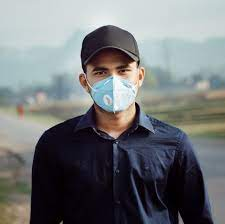

In [7]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

### <font color = 'Orange'>Step7. Download & save each image in Destination directory</font>

In [8]:
os.getcwd()

'C:\\Users\\RANJAN_KESHRI\\Desktop\\MTECH\\DL\\Projects\\Covid19-Face-Mask-detection-main'

In [11]:
os.chdir(r'C://Users//RANJAN_KESHRI//Desktop//MTECH//DL//Projects//Covid19-Face-Mask-detection-main/Dataset/mask')
baseDir=os.getcwd()
baseDir

'C:\\Users\\RANJAN_KESHRI\\Desktop\\MTECH\\DL\\Projects\\Covid19-Face-Mask-detection-main\\Dataset\\mask'

In [15]:
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://live.staticflickr.com/65535/50452537607_aaaea2cf5f_b.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                     0.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKwSSZah2xkJPW1uXtfzov3is3HqyhvKy5hg&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                     1.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQg1-v2HPDfEo7FYMR8gCi0hba1imI8Uw4Xlw&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                  

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdtUNQyOK4JdAgMLkmlelC595n3HxXpZjI9g&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    24.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2Ip1RCG7W82fjCKIk0bYcdNiXgSbhnAjskQ&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    25.jpg
SAVED - https://p1.pxfuel.com/preview/471/506/506/gas-mask-press-journalist-violence.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                  

SAVED - https://c2.peakpx.com/wallpaper/332/237/283/strassenfasnet-fools-jump-wallpaper-preview.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    46.jpg
SAVED - https://media.defense.gov/2021/Feb/17/2002583956/-1/-1/0/200406-D-HN545-2001.JPG - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    47.jpg
ERROR - COULD NOT DOWNLOAD https://upload.wikimedia.org/wikipedia/commons/1/14/Wearing_FFP_mask_during_the_COVID-19_pandemic_in_Khmelnytskyi%2C_April_2020.jpg - ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
S

SAVED - https://cdn.pixabay.com/photo/2020/03/30/04/35/girl-wearing-a-mask-4983019_960_720.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    68.jpg
SAVED - https://live.staticflickr.com/65535/49567347386_963514003e_b.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    69.jpg
SAVED - https://c0.wallpaperflare.com/preview/564/422/335/selective-focus-photography-of-man-wearing-mask-and-shirt-at-night.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                          

SAVED - https://p1.pikrepo.com/preview/875/954/woman-wearing-grey-turtleneck-long-sleeved-shirt-and-blue-face-mask.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    91.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4wM_x8xjmsYlMq-Aso-MiQiqk0-deBbwkIw&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                    92.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKgj1kuEQMdJFgy8ox3AOY-P0I4JLy4zzfkA&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                    

SAVED - https://images.pexels.com/photos/4472634/pexels-photo-4472634.jpeg?cs=srgb&dl=pexels-oladimeji-ajegbile-4472634.jpg&fm=jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                   114.jpg
SAVED - https://p0.pikist.com/photos/125/131/coronavirus-mask-student-boy-guy-young-man-guy-wearing-face-mask-face-mask-flu-mask.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                   115.jpg
SAVED - https://media.defense.gov/2021/Jan/28/2002577053/780/780/0/210110-F-YH293-1062.JPG - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                

SAVED - https://upload.wikimedia.org/wikipedia/commons/7/70/Venezuelan_protester_wearing_a_Guy_Fawkes_Mask.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                   138.jpg
SAVED - https://health.mil/-/media/Images/MHS/Photos/Mental-Health-Media-Roundtable.ashx?h=408&la=en&mw=720&w=720&hash=F644545C03FD6BD5B8700EAA6889A5BF483F2F315B2B044C5F27490A30ABBA20 - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                   139.jpg
SAVED - https://p0.pikist.com/photos/864/601/teenager-mask-portrait-boy-young-man-guy-boy-wearing-mask-flu-mask-face-mask.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face

SAVED - https://live.staticflickr.com/65535/49561385762_f793a2325d_b.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                   161.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQD5azhK276WWLfN90urYyia-Ukm63Ms8Im5w&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\mask\                                                                                                                                                   162.jpg


## <font color = 'Orange'>Scraping No Mask Dataset</font>

In [16]:
#Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\RANJAN_KESHRI\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


In [17]:
#Specify Search URL
search_url = "https://www.google.com/search?q=person+images&tbm=isch&ved=2ahUKEwiBhNGa6JTxAhXbLSsKHToXAd4Q2-cCegQIABAA&oq=person+images&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BwgjEOoCECc6BAgjECc6BAgAEEM6BQgAELEDOgcIABCxAxBDUIM1WOFYYLFaaAJwAHgAgAGBAYgB9gmSAQQxMi4ymAEAoAEBqgELZ3dzLXdpei1pbWewAQrAAQE&sclient=img&ei=WhXGYIHvHtvbrAG6roTwDQ&bih=689&biw=1280"
driver.get(search_url.format(q='not wearing mask'))

In [18]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions  

In [19]:
#Locate the images to be scraped from the current page
imgResults = driver.find_elements_by_xpath('//img[contains(@class,"rg_i") and contains(@class, "Q4LuWd")]')
totalResults=len(imgResults)

In [23]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="161" height="215" alt="400,000+ Best Person Photos · 100% Free Download · Pexels Stock Photos" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuYUlQSxjneNqj7QzWiLD58XkK2Mtq8pUtMQ&amp;usqp=CAU"> is not clickable at point (106, 526). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 499px;">...</div>
  (Session info: chrome=91.0.4472.124)



In [24]:
os.chdir(r'C://Users//RANJAN_KESHRI//Desktop//MTECH//DL//Projects//Covid19-Face-Mask-detection-main/Dataset/nomask')
baseDir=os.getcwd()
baseDir

'C:\\Users\\RANJAN_KESHRI\\Desktop\\MTECH\\DL\\Projects\\Covid19-Face-Mask-detection-main\\Dataset\\nomask'

In [26]:
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://st3.depositphotos.com/9881890/16378/i/600/depositphotos_163785870-stock-photo-blonde-smiling-businesswoman.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                     0.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTynJDIV_Hrt-eXchhQBK0tdq7fpViVi02VA&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                     1.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJfa758-9Zet25uR43OnWUDxPh_5ivrKWg4g&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                      

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRemgXpPlY7VFpNLDk3FyMuI4MTCKZciprt7Q&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    24.jpg
SAVED - https://thumbs.dreamstime.com/b/surprised-female-person-confused-isolated-surprised-female-person-confused-isolated-168304856.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    25.jpg
SAVED - https://blog.ipleaders.in/wp-content/uploads/2016/10/Fb-dp.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                

SAVED - https://static.generated.photos/vue-static/face-generator/landing/wall/20.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    47.jpg
SAVED - https://lh3.googleusercontent.com/proxy/vxKCgGAO8jxy1k28kBJ4QmOboEn7AjPbgGDNstvpiRPNwwGCy6FJLa2SDfd0UjDFKz8z6ikri2jKsH4dtClRDCW0EeLhqitQb6FOgtDZhlwC8c8KxwI9Trvp6sDCzgv0r6-gOnSje6XDc84 - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    48.jpg

C:\Users\RANJAN_KESHRI\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCc2ULjz_BX_a91BvhR-9tXfknyrIDOoFGfQ&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    49.jpg
SAVED - https://news.illinois.edu/files/6367/1446774519/178222.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    50.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmxEVcYXelFAsbImwHv0xmnk7ZBNnMvxfhPA&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                 

SAVED - https://globalnews.ca/wp-content/uploads/2017/05/oldestmanthumb.jpg?quality=85&strip=all - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    73.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnOj_Nz_Z9MdM0klmEfAkKOUG-p6Xq6YPGbA&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    74.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiTjuMocKg0jcLx1Fiar0oodOjIRAnjZ2EWw&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                    

SAVED - https://precisionhealth.iu.edu/images/BernicePescosolido.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    95.jpg
SAVED - https://images.unsplash.com/photo-1544005313-94ddf0286df2?ixid=MnwxMjA3fDB8MHxzZWFyY2h8OXx8cGVyc29ufGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&w=1000&q=80 - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                    96.jpg
SAVED - https://nmaahc.si.edu/sites/default/files/styles/featured_image_16x9/public/images/header/audience-citizen_0.jpg?itok=yoGQec7Q - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                      

SAVED - https://machinecurve.com/wp-content/uploads/2019/07/thispersondoesnotexist-1-1022x1024.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                   119.jpg
SAVED - https://image.cnbcfm.com/api/v1/image/106689818-1599150563582-musk.jpg?v=1620227840&w=1600&h=900 - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                   120.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPfonhnfG1jZc2m1_AeZL13feMIalfd2BX1g&usqp=CAU - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                     

SAVED - https://www.glassdoor.com/blog/app/uploads/sites/2/why-are-you-the-best-person-for-this-job-724x450.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                   142.jpg
SAVED - https://www.dmarge.com/wp-content/uploads/2021/01/dwayne-the-rock-.jpg - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                                                                                                   143.jpg
SAVED - https://assets.entrepreneur.com/content/3x2/2000/20170425212229-GettyImages-483241343.jpeg?width=700&crop=2:1 - AT: C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main\Dataset\nomask\                                                                        